## 업종 분석

시가총액의 순위 혹은 순위 변화는 개별 종목의 상대적 위치를 알려준다. 산업 전체의 흐름을 보기위해서는 업종(sector)를 살펴보는 것이 더 중요한 의미를 지닐 수 있다. 

In [1]:
%matplotlib inline
from IPython.display import display

In [2]:
import pandas as pd
import numpy as np

"krx-marcap-with-sector.csv" 파일을 DataFrame으로 읽어 들인다. 이 데이터 파일은 앞서 만들어진 "krx-marcap.csv" 데이터에 거래소 업종 정보 컬럼을 추가한 것이다.

In [3]:
df_master = pd.read_csv('data/krx-marcap-with-sector.csv', dtype={'code':str})
df_master.head(10)

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
0,1,015760,한국전력,18.994194,0.134566,1995-12-01,KEPCO,전기가스,KOSPI
1,2,005930,삼성전자,7.665979,0.054310,1995-12-01,Samsung Electronics,전기전자,KOSPI
2,3,005490,POSCO,4.760822,0.033728,1995-12-01,POSCO,철강금속,KOSPI
3,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01,SK Telecom,통신업,KOSPI
4,5,000200,대우중공업,3.019233,0.021390,1995-12-01,NaN,NaN,NaN
5,6,002610,엘지전자,2.147247,0.015212,1995-12-01,NaN,NaN,NaN
6,7,015940,데이콤,1.621128,0.011485,1995-12-01,NaN,NaN,NaN
7,8,000720,현대건설,1.595383,0.011303,1995-12-01,Hyundai Eng. & Constr.,건설업,KOSPI
8,9,015580,신한은행,1.568640,0.011113,1995-12-01,NaN,NaN,NaN
9,10,005931,삼성전자(1신),1.492631,0.010575,1995-12-01,NaN,NaN,NaN


## 데이터 파일 구성

krx-marcap-with-sector.csv (1995년 ~ 2015년) 파일은 다음과 같이 구성되어 있다.
* rank: 해당 년도(year) 순위
* code: 종목코드
* name: 회사명
* marcap: 시가총액(단위: 조원)
* marcap_pct: 시가총액 비중 (0~1)
* year: 년도
* name_en: 영문 회사명
* sector: 업종구분(한국 거래소)
* market: 시장구분(KOSPI, KOSDAQ)

이 파일은 https://goo.gl/sTLaJa 에서 다운로드 할 수 있다.

<table class="dataframe" border="1">
<thead>
<tr>
<th>&nbsp;</th>
<th>rank</th>
<th>code</th>
<th>name</th>
<th>marcap</th>
<th>marcap_pct</th>
<th>year</th>
<th>name_en</th>
<th>sector</th>
<th>market</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>015760</td>
<td>한국전력</td>
<td>18.994194</td>
<td>0.134566</td>
<td>1995-12-01</td>
<td>KEPCO</td>
<td>전기가스</td>
<td>KOSPI</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>005930</td>
<td>삼성전자</td>
<td>7.665979</td>
<td>0.054310</td>
<td>1995-12-01</td>
<td>Samsung Electronics</td>
<td>전기전자</td>
<td>KOSPI</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>005490</td>
<td>POSCO</td>
<td>4.760822</td>
<td>0.033728</td>
<td>1995-12-01</td>
<td>POSCO</td>
<td>철강금속</td>
<td>KOSPI</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>017670</td>
<td>SK텔레콤</td>
<td>3.229820</td>
<td>0.022882</td>
<td>1995-12-01</td>
<td>SK Telecom</td>
<td>통신업</td>
<td>KOSPI</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>000200</td>
<td>대우중공업</td>
<td>3.019233</td>
<td>0.021390</td>
<td>1995-12-01</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr>
<th>5</th>
<td>6</td>
<td>002610</td>
<td>엘지전자</td>
<td>2.147247</td>
<td>0.015212</td>
<td>1995-12-01</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
</tbody>
</table>

In [4]:
print ( len(df_master), "rows")

36634 rows


## 2015년 시장 업종 분석

우선 2015년 데이터를 읽어 보자.

In [5]:
df_2015 = df_master[df_master['year'] == '2015-12-01']
print (len(df_2015), "rows")

display (df_2015.head(10))

2133 rows


,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
34501,1,005930,삼성전자,190.752641,0.130428,2015-12-01,Samsung Electronics,전기전자,KOSPI
34502,2,005380,현대차,33.371887,0.022818,2015-12-01,Hyundai Motor,운수장비,KOSPI
34503,3,015760,한국전력,32.290793,0.022079,2015-12-01,KEPCO,전기가스,KOSPI
34504,4,028260,삼성물산,27.979281,0.019131,2015-12-01,Samsung C&T Corporation,유통업,KOSPI
34505,5,005935,삼성전자우,24.888435,0.017018,2015-12-01,Samsung Electronics,전기전자,KOSPI
34506,6,012330,현대모비스,24.384638,0.016673,2015-12-01,Hyundai Mobis,운수장비,KOSPI
34507,7,090430,아모레퍼시픽,24.231044,0.016568,2015-12-01,AmorePacific,화학,KOSPI
34508,8,000660,SK하이닉스,23.805677,0.016277,2015-12-01,SK Hynix,전기전자,KOSPI
34509,9,051910,LG화학,22.499038,0.015384,2015-12-01,LG Chem,화학,KOSPI
34510,10,032830,삼성생명,21.900000,0.014974,2015-12-01,Samsung Life Insurance,보험업,KOSPI


'sector'(업종)컬럼의 데이터를 살펴보자.

DataFrame의 하나의 컬럼은 Series 이다. Series.value_counts() 함수로 Series내 값들의 고유한 항목과 각 항목의 개수를 얻을 수 있다.

In [6]:
sector_counts = df_2015['sector'].value_counts()

display (sector_counts.count())  # 업종수 
display (sector_counts.index)    # 업종항목: '화학', '서비스업', '반도체', 'IT부품', 등 …
display (sector_counts.values)  # 업종내 기업수: 160 151 109 109  76  64  64  …

64

Index(['화학', '서비스업', '반도체', 'IT부품', '기계,장비', '금속', '전기전자', '유통업', '제약',
       '금융서비스', '운송장비,부품', '운수장비', '통신장비', '소프트웨어', '도매', '철강금속', '음식료', '의약품',
       '기계', '건설업', '비금속', '미분류', '의료,정밀기기', '디지털컨텐츠', '일반전기전자', '증권', '섬유의복',
       '종이목재', '컴퓨터서비스', '운수창고', '전문기술', '음식료,담배', '오락,문화', '정보기기', '보험업',
       '연구,개발', '금융', '기타금융업', '섬유,의류', '전문건설', '종합건설', '사업지원', '전기가스', '인터넷',
       '출판,매체복제', '통신서비스', '종이,목재', '방송서비스', '소매', '기타제조', '교육', '환경', '은행',
       '의료정밀', '부동산', '육상운송', '통신업', '여행운송', '기타서비스', '전기,가스', '농업', '자동차판매',
       '숙박,음식', '비금속광업'],
      dtype='object')

array([160, 151, 109, 109,  76,  64,  64,  63,  62,  58,  57,  56,  55,
        53,  49,  48,  47,  47,  44,  41,  40,  37,  34,  34,  33,  32,
        27,  25,  25,  24,  22,  22,  21,  21,  16,  14,  14,  14,  12,
        12,  12,  12,  11,  11,   9,   9,   9,   9,   8,   8,   8,   5,
         4,   4,   3,   3,   3,   2,   2,   2,   1,   1,   1,   1])

종목들을 분류하는 업종(sector)의 수는 64개이며, '화학', '서비스업', 'IT부품', '반도체' 등이 있다. 흥미로운 것은 sector_counts의 valuses 인데 각각이 항목 개수이다. 즉, 업종에 속한 회사들이 몇개인지를 파악할 수 있다. '화학' 160개, '서비스업' 151개, 'IT부품' 109개 .. 이렇게 파악할 수 있다. 

크기 순서대로 나열되므로, 다음과 같이 간단하게 가장 많은 순서로 TOP 10을 뽑을 수 있다.

In [7]:
sector_counts.head(10)

화학       160
서비스업     151
반도체      109
IT부품     109
기계,장비     76
금속        64
전기전자      64
유통업       63
제약        62
금융서비스     58
Name: sector, dtype: int64

## 업종 분포 차트

선두 20개 업종의 종목 수를 차트로 표현해 보자. sector_counts 자체가 내림차순으로 정렬되어 있으므로 sector_counts[:20] 추출할 수 있다.

In [8]:
top20 = sector_counts[:20]
top20

화학         160
서비스업       151
반도체        109
IT부품       109
기계,장비       76
금속          64
전기전자        64
유통업         63
제약          62
금융서비스       58
운송장비,부품     57
운수장비        56
통신장비        55
소프트웨어       53
도매          49
철강금속        48
음식료         47
의약품         47
기계          44
건설업         41
Name: sector, dtype: int64

In [9]:
display (top20.index)
display (top20.values)

Index(['화학', '서비스업', '반도체', 'IT부품', '기계,장비', '금속', '전기전자', '유통업', '제약',
       '금융서비스', '운송장비,부품', '운수장비', '통신장비', '소프트웨어', '도매', '철강금속', '음식료', '의약품',
       '기계', '건설업'],
      dtype='object')

array([160, 151, 109, 109,  76,  64,  64,  63,  62,  58,  57,  56,  55,
        53,  49,  48,  47,  47,  44,  41])

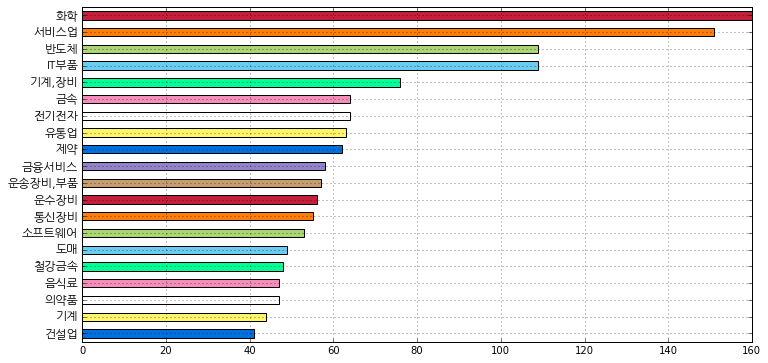

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

colors_list = [ "#C41F3B", "#FF7D0A", "#ABD473", "#69CCF0", "#00FF96", "#F58CBA", "#FFFFFF", "#FFF569", "#0070DE", "#9482C9", "#C79C6E" ]

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

ax = top20.plot.barh(color=colors_list, grid=True, figsize=(12,6))
ax.invert_yaxis()

for label in ax.get_yticklabels() :
    label.set_fontproperties(fontprop)

2015년 데이터를 KOSPI와 KOSDAQ을 구분하여 보자.

In [11]:
df_2015_ks = df_master.ix[df_master['year'].isin(['2015-12-01']) & df_master['market'].isin(['KOSPI'])]
df_2015_kq = df_master.ix[df_master['year'].isin(['2015-12-01']) & df_master['market'].isin(['KOSDAQ'])]

print ('종목수:')
print ('KOSPI', len(df_2015_ks))
print ('KOSDAQ', len(df_2015_kq))

종목수:
KOSPI 883
KOSDAQ 1147


위 내용과 동일한 결과이지만 약간 다르게 표현해 보면,

In [12]:
df_2015 = df_master.ix[df_master['year'] == '2015-12-01']

df_2015_ks = df_2015.ix[df_2015['market'] == 'KOSPI']
df_2015_kq = df_2015.ix[df_2015['market'] == 'KOSDAQ']

print ('종목수:')
print ('KOSPI', len(df_2015_ks))
print ('KOSDAQ', len(df_2015_kq))

종목수:
KOSPI 883
KOSDAQ 1147


앞서 살펴본 바와 같이 Series.value_counts() 함수를 사용하여 'sector'(업종)  컬럼의 수를 얻는다.

In [13]:
sector_counts_ks = df_2015_ks['sector'].value_counts()
sector_counts_kq = df_2015_kq['sector'].value_counts()

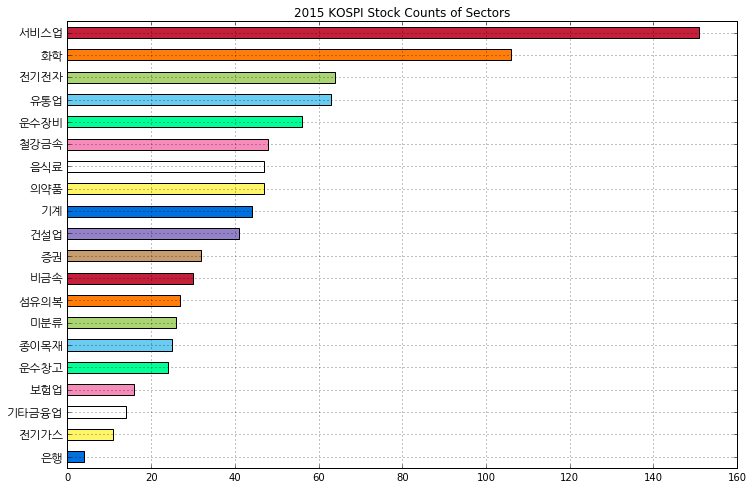

In [14]:
ax = sector_counts_ks[:20].plot.barh(color=colors_list, grid=True, figsize=(12,8))
ax.set_title('2015 KOSPI Stock Counts of Sectors')
ax.invert_yaxis()
for label in ax.get_yticklabels() :
    label.set_fontproperties(fontprop)

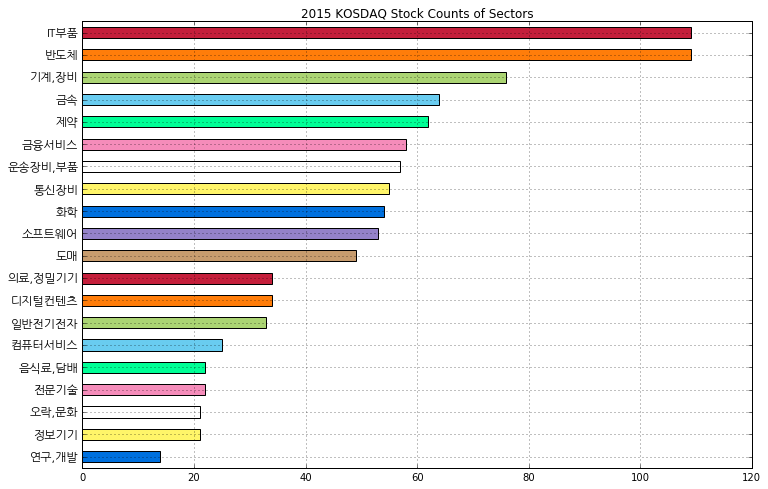

In [15]:
ax = sector_counts_kq[:20].plot.barh(color=colors_list, grid=True, figsize=(12,8))
ax.set_title('2015 KOSDAQ Stock Counts of Sectors')
ax.invert_yaxis()
for label in ax.get_yticklabels() :
    label.set_fontproperties(fontprop)

KOSPI와 KOSDAQ에 분포해있는 업종과 업종내 종목수의 분포를 관찰해 보자. KOSPI는 서비스와 화학/전기 전자 같은 제조업 종목이 많으며, KOSPI는 반도체, IT부품, 기계 장비 등 기술중심 업종이 많은 것을 알 수 있다.

## 시가총액 합산, 비중

시가총액 합산, 비중 등을 산출해 보자

In [16]:
df_2015 = df_master.ix[df_master['year'] == '2015-12-01']

df_2015_ks = df_2015.ix[df_2015['market'] == 'KOSPI']
df_2015_kq = df_2015.ix[df_2015['market'] == 'KOSDAQ']

print( '시가총액: ', df_2015['marcap'].sum() )
print( 'KOSPI 시가총액: ', df_2015_ks['marcap'].sum() )
print( 'KOSDAQ 시가총액: ', df_2015_kq['marcap'].sum() )

print( 'KOSPI 시가총액 비중 (전체시장에서): ', df_2015_ks['marcap'].sum() / df_2015['marcap'].sum())
print( 'KOSDAQ 시가총액 (전체시장에서): ', df_2015_kq['marcap'].sum() / df_2015['marcap'].sum())

시가총액:  1462.515474
KOSPI 시가총액:  1265.684071
KOSDAQ 시가총액:  192.218624
KOSPI 시가총액 비중 (전체시장에서):  0.865415849268
KOSDAQ 시가총액 (전체시장에서):  0.131430147179


2015년 모든 종목의 시가총액의 합(즉, 한국 증권 시장 시가총액)은 1460조원이 약간 넘는다. KOSPI 시가총액은 시장 전체 시가총액의 86%가 조금 넘으며, KOSDAQ의 경우는 13% 정도 된다.

이런 합산 데이터 산출과 비중을 비교하는 것은 전체를 살피는데 도움이 된다.

범위를 줄여 KOSDAQ 시장과 반도체 업종을 살펴보자.

In [17]:
# KOSDAQ시장에서 반도체 종목만
df_semi = df_2015_kq[df_2015_kq['sector']=='반도체']
display( df_semi.head() )

print( '반도체 업종 종목 수: ', len(df_semi) ) 
print( '반도체 업종 시가총액: ', df_semi['marcap'].sum() ) 
print( '반도체 업종 시가총액 비중: ', df_semi['marcap'].sum() / df_2015_kq['marcap'].sum() )

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
34646,146,039030,이오테크닉스,1.409895,0.000964,2015-12-01,EO Technics,반도체,KOSDAQ
34668,168,036490,OCI머티리얼즈,1.142313,0.000781,2015-12-01,OCI Materials,반도체,KOSDAQ
34703,203,046890,서울반도체,0.906649,0.000620,2015-12-01,Seoul Semiconductor,반도체,KOSDAQ
34713,213,030530,원익IPS,0.841232,0.000575,2015-12-01,Wonik IPS,반도체,KOSDAQ
34742,242,058470,리노공업,0.699625,0.000478,2015-12-01,Leeno Industrial Inc.,반도체,KOSDAQ


반도체 업종 종목 수:  109
반도체 업종 시가총액:  16.858549
반도체 업종 시가총액 비중:  0.087705075862


우리나라 KOSDAQ 시장에서 반도체 업종 종목은 109개, 시가총액은 16조원 정도이다. 반도체 업종이 KOSDAQ시장에서 차지하는 비중은 약 8.7% 정도이다.

## 업종별 시가총액

업종을 하나씩 선별해가며 계산할 수도 있겠지만, pandas.pivot_table()을 이용하면 이런 작업을 한방에 처리할 수 있다.

In [18]:
# pivot_table(): 'sector'(업종)으로 인덱스를 생성, 'marcap'(시가총액)을 값으로 하되 동일한 업종은 합산(np.sum)
piv = df_2015_ks.pivot_table(index=['sector'], values='marcap', aggfunc=np.sum)

# 복사본을 만들고, 값 기준으로 내림차순 소트
sector_marcap = piv.copy()
sector_marcap.sort_values(ascending=False, inplace=True)
sector_marcap

sector
전기전자     287.875933
서비스업     194.308660
화학       143.914883
운수장비     120.701497
유통업       85.366612
보험업       61.112385
기타금융업     57.289581
철강금속      41.355757
음식료       39.491417
전기가스      39.087887
통신업       31.047968
의약품       26.240103
증권        22.194504
운수창고      21.744998
건설업       20.929716
미분류       20.746615
기계        19.631011
은행        14.247164
섬유의복       7.314366
비금속        7.075211
종이목재       3.062847
의료정밀       0.944956
Name: marcap, dtype: float64

In [19]:
sector_marcap.keys

<bound method Series.keys of sector
전기전자     287.875933
서비스업     194.308660
화학       143.914883
운수장비     120.701497
유통업       85.366612
보험업       61.112385
기타금융업     57.289581
철강금속      41.355757
음식료       39.491417
전기가스      39.087887
통신업       31.047968
의약품       26.240103
증권        22.194504
운수창고      21.744998
건설업       20.929716
미분류       20.746615
기계        19.631011
은행        14.247164
섬유의복       7.314366
비금속        7.075211
종이목재       3.062847
의료정밀       0.944956
Name: marcap, dtype: float64>

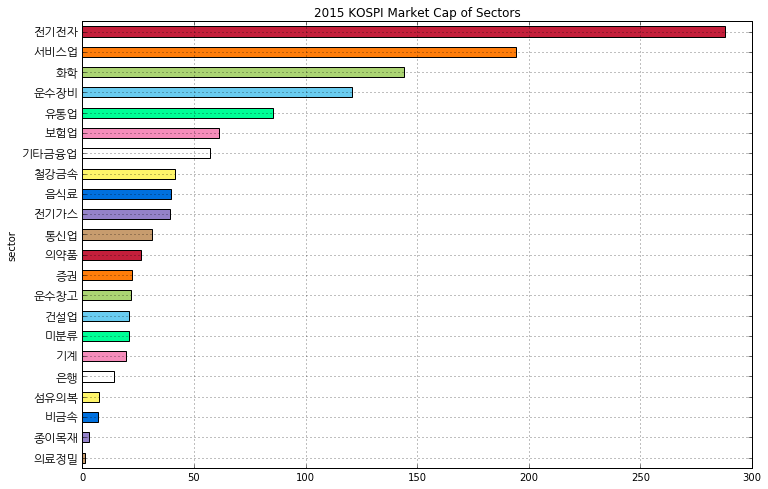

In [20]:
ax = sector_marcap.plot.barh(color=colors_list, grid=True, figsize=(12,8))
ax.invert_yaxis()
ax.set_title('2015 KOSPI Market Cap of Sectors')

for label in ax.get_yticklabels() :
    label.set_fontproperties(fontprop)

In [21]:
sector_marcap.index

Index(['전기전자', '서비스업', '화학', '운수장비', '유통업', '보험업', '기타금융업', '철강금속', '음식료',
       '전기가스', '통신업', '의약품', '증권', '운수창고', '건설업', '미분류', '기계', '은행', '섬유의복',
       '비금속', '종이목재', '의료정밀'],
      dtype='object', name='sector')

## 시가총액과 종목수

KOSPI 업종 시가총액과 KOSPI 종목수를 나란히 놓고 비교하는 차트를 그려본다

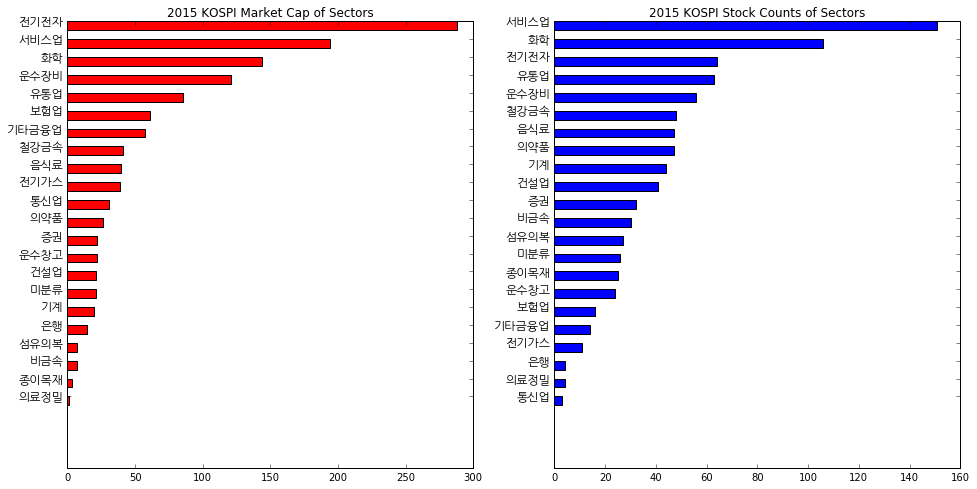

In [22]:
fig = plt.figure(figsize=(16,8))

# KOSPI 업종 시가총액
ind = range(len(sector_marcap))
ax1 = fig.add_subplot(121)
ax1.barh(ind, sector_marcap.values, 0.5, color='r')
ax1.set(yticks=ind, yticklabels=sector_marcap.index)
ax1.invert_yaxis()
ax1.set_title('2015 KOSPI Market Cap of Sectors')
for label in ax1.get_yticklabels() :
    label.set_fontproperties(fontprop)

# KOSPI 종목수
ind = range(len(sector_counts_ks))
ax2 = fig.add_subplot(122)
ax2.barh(ind, sector_counts_ks.values, 0.5, color='b')
ax2.set(yticks=ind, yticklabels=sector_counts_ks.index)
ax2.set_title('2015 KOSPI Stock Counts of Sectors')
ax2.invert_yaxis()
for label in ax2.get_yticklabels() :
    label.set_fontproperties(fontprop)
    

## 20년전과 시장, 종목 비교

20년의 간격이 있는 두 개의 년도 1995년과 2015년의 업종의 변화를 비교해 해본다. 우선 종목을 추출해보자.

In [23]:
df_1995 = df_master[df_master['year'] == '1995-12-01']
df_2015 = df_master[df_master['year'] == '2015-12-01']

display('%s rows' % len(df_1995))
display(df_1995.head())

display('%s rows' % len(df_2015))
display(df_2015.head())

'1122 rows'

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
0,1,015760,한국전력,18.994194,0.134566,1995-12-01,KEPCO,전기가스,KOSPI
1,2,005930,삼성전자,7.665979,0.054310,1995-12-01,Samsung Electronics,전기전자,KOSPI
2,3,005490,POSCO,4.760822,0.033728,1995-12-01,POSCO,철강금속,KOSPI
3,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01,SK Telecom,통신업,KOSPI
4,5,000200,대우중공업,3.019233,0.021390,1995-12-01,NaN,NaN,NaN


'2133 rows'

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
34501,1,005930,삼성전자,190.752641,0.130428,2015-12-01,Samsung Electronics,전기전자,KOSPI
34502,2,005380,현대차,33.371887,0.022818,2015-12-01,Hyundai Motor,운수장비,KOSPI
34503,3,015760,한국전력,32.290793,0.022079,2015-12-01,KEPCO,전기가스,KOSPI
34504,4,028260,삼성물산,27.979281,0.019131,2015-12-01,Samsung C&T Corporation,유통업,KOSPI
34505,5,005935,삼성전자우,24.888435,0.017018,2015-12-01,Samsung Electronics,전기전자,KOSPI


종목수에서 큰 차이를 보인다. 1995년에는 1995년에는 1122개, 2015년에는 종목수는 2133개로 거의 두배가 늘었다. 단, 종목수에는 우선주등이 포함되기 때문에 회사의 수와 같지는 않다.  

2015년에 있는 종목들 중에 1995년부터 존재했던 즉, 20년 이상된 종목수는 얼마나 될까?

df_2015 와 df_1995를 merge()하면서 공통적으로 존재(how='inner')하는 코드와 이름(on=['code', 'name'])을 추출하면, 이 질문에 답이 될 수 있다. 

In [24]:
intersec = df_2015.merge(df_1995, how='inner', on=['code', 'name'], suffixes=('_2015', '_1995'))
df_long = intersec[['rank_2015', 'code', 'name', 'marcap_2015', 'marcap_pct_2015', 'rank_1995', 'marcap_1995', 'marcap_pct_1995']]

print ("1995, 2015 공통 종목수: %d" % len(df_long))
df_long.head(20)

1995, 2015 공통 종목수: 487


,rank_2015,code,name,marcap_2015,marcap_pct_2015,rank_1995,marcap_1995,marcap_pct_1995
0,1,005930,삼성전자,190.752641,0.130428,2,7.665979,0.054310
1,2,005380,현대차,33.371887,0.022818,13,1.408595,0.009979
2,3,015760,한국전력,32.290793,0.022079,1,18.994194,0.134566
3,5,005935,삼성전자우,24.888435,0.017018,14,1.386208,0.009821
4,6,012330,현대모비스,24.384638,0.016673,57,0.352366,0.002496
5,11,000270,기아차,21.889621,0.014967,15,1.378519,0.009766
6,15,017670,SK텔레콤,18.773378,0.012836,4,3.229820,0.022882
7,18,005490,POSCO,15.606443,0.010671,3,4.760822,0.033728
8,20,000810,삼성화재,15.136260,0.010349,29,0.857017,0.006072
9,22,003550,LG,12.890018,0.008814,23,1.078578,0.007641


이렇게 만들어진 테이블을 살펴보자. 위 표는 20년전부터 있었던 종목 487개 중에 현재 시가총액 상위 20개이다.
독특한 종목을 몇 개 과거와 비교해 살펴보자. 한미사이언스는 시가총액 3백억(530위)였다가 7.3조(38위) 기업이 되었다. 시가총액으로 따지면 219배 성장한 것이다. 오리온의 약진(82배)도 눈에 띈다.

## DataFrame.style() 시각화

숫자 데이터를 좀 더 보기 쉽게 시각화 해주는 pandas의 style() 기능을 활용해 보자. 
이 기능은 pandas 0.17.1 (2015-11-21 배포)에 새롭게 추가된 기능으로 테이블 형태의 데이터를 보기 쉽게 시각화 해준다.

In [38]:
df_long = df_long.copy()
df_long['growth'] = df_long['marcap_2015'] / df_long['marcap_1995']

df_long20 = df_long[:20]
df_long20 = df_long20.style.bar(subset=['growth'], color='#d65f5f')
df_long20

과거 20년간 한미사이언스, 오리온, 아모레, 현대모비스 등이 약진한 것을 한눈에 볼 수 있다.

## 파이차트

업종내 종목수, 업종 시가총액을 파이차트로 시각화 하여 비교해 본다

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

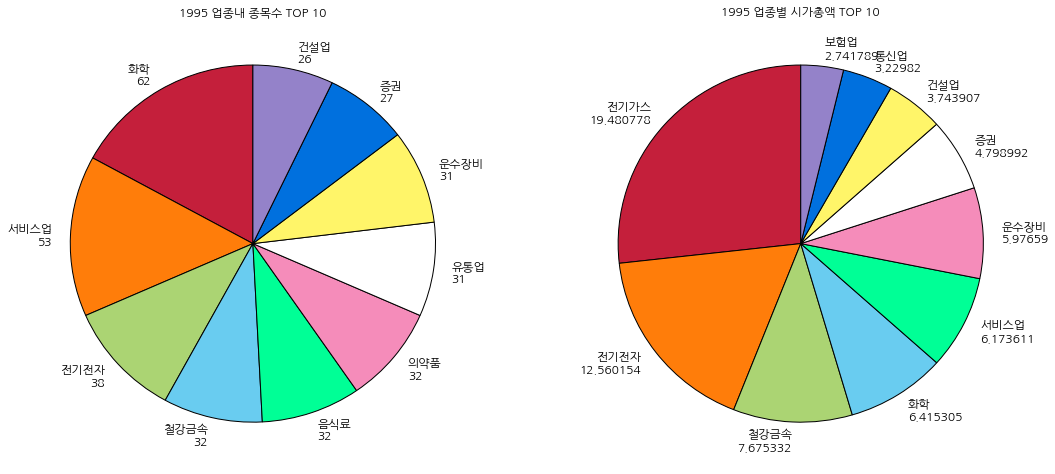

In [44]:
# 1995년 시가총액 분석
df_1995 = df_master.ix[df_master['year'] == '1995-12-01']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 8)

# 첫번째 파이 차트 (업종내 종목수)
sector_counts = df_1995['sector'].value_counts()
labels = []
for idx, row in sector_counts[:10].iteritems():
    labels.append( str(idx) + '\n' + str(row) )

axes[0].set_title("1995 업종내 종목수 TOP 10", fontproperties=fontprop)
patches, texts = axes[0].pie(sector_counts[:10], labels=labels, startangle=90, colors=colors_list)

for text in texts:
    text.set_font_properties(fontprop)
    
# 두번째 파이 차트 (업종별 시가총액)
piv = pd.pivot_table(df_1995, values='marcap', index=['sector'], aggfunc=np.sum)
sector_marcap = piv.copy()
sector_marcap.sort_values(ascending=False, inplace=True)
labels = []
for idx, row in sector_marcap[:10].iteritems():
    labels.append( str(idx) + '\n' + str(row) )

axes[1].set_title("1995 업종별 시가총액 TOP 10", fontproperties=fontprop)
patches, texts = axes[1].pie(sec_mar_top, labels=labels, startangle=90, colors=colors_list)

for text in texts:
    text.set_font_properties(fontprop)

In [53]:
display ('1995년')

display ("종목수 합계: %d" % sector_counts.sum())
display (sector_counts[:10])
display ("시가총액 합계: %d (조원)" % sector_marcap.sum())
display (sector_marcap[:10])


'1995년'

'종목수 합계: 2030'

화학       160
서비스업     151
반도체      109
IT부품     109
기계,장비     76
금속        64
전기전자      64
유통업       63
제약        62
금융서비스     58
Name: sector, dtype: int64

'시가총액 합계: 1457 (조원)'

sector
전기전자     287.875933
서비스업     194.308660
화학       151.888602
운수장비     120.701497
유통업       85.366612
보험업       61.112385
기타금융업     57.289581
철강금속      41.355757
음식료       39.491417
전기가스      39.087887
Name: marcap, dtype: float64

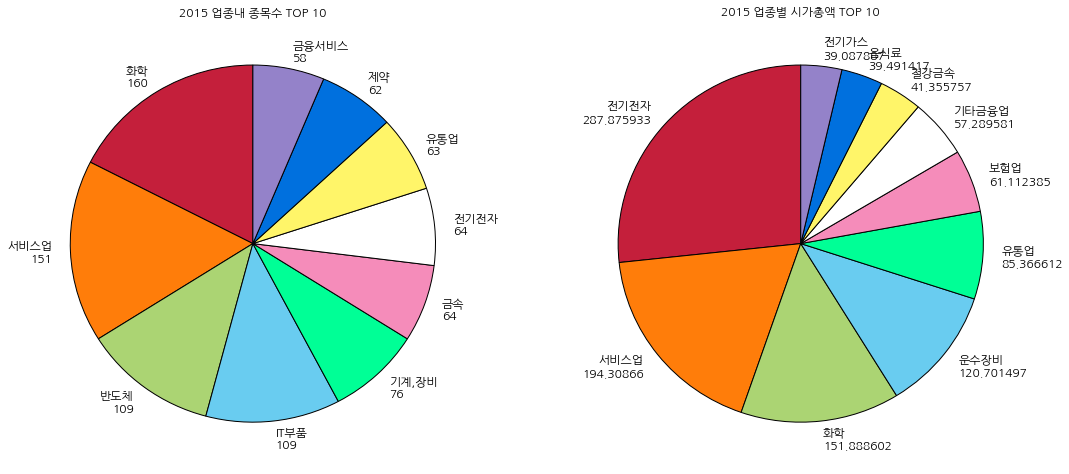

In [50]:
# 2015년 시가총액 분석
df_2015 = df_master.ix[df_master['year'] == '2015-12-01']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 8)


# 첫번째 파이 차트 (업종내 종목수)
sector_counts = df_2015['sector'].value_counts()
labels = []
for idx, row in sector_counts[:10].iteritems():
    labels.append( str(idx) + '\n' + str(row) )

axes[0].set_title("2015 업종내 종목수 TOP 10", fontproperties=fontprop)
patches, texts = axes[0].pie(sector_counts[:10], labels=labels, startangle=90, colors=colors_list)

for text in texts:
    text.set_font_properties(fontprop)
    
# 두번쨰 파이 차트 (업종별 시가총액)
piv = pd.pivot_table(df_2015, values='marcap', index=['sector'], aggfunc=np.sum)
sector_marcap = piv.copy()
sector_marcap.sort_values(ascending=False, inplace=True)
labels = []
for idx, row in sector_marcap[:10].iteritems():
    labels.append( str(idx) + '\n' + str(row) )

axes[1].set_title(u"2015 업종별 시가총액 TOP 10", fontproperties=fontprop)
patches, texts = axes[1].pie(sector_marcap[:10], labels=labels, startangle=90, colors=colors_list)

for text in texts:
    text.set_font_properties(fontprop)

In [52]:
display ('2015년')

display ("종목수 합계: %d" % sector_counts.sum())
display (sector_counts[:10])
display ("시가총액 합계: %d (조원)" % sector_marcap.sum())
display (sector_marcap[:10])


'2015년'

'종목수 합계: 2030'

화학       160
서비스업     151
반도체      109
IT부품     109
기계,장비     76
금속        64
전기전자      64
유통업       63
제약        62
금융서비스     58
Name: sector, dtype: int64

'시가총액 합계: 1457 (조원)'

sector
전기전자     287.875933
서비스업     194.308660
화학       151.888602
운수장비     120.701497
유통업       85.366612
보험업       61.112385
기타금융업     57.289581
철강금속      41.355757
음식료       39.491417
전기가스      39.087887
Name: marcap, dtype: float64

## 20년간 (1995년 ~ 2015년) 시가총액 분석

* 시가총액 30위권을 지킨 기업은 9개 (삼성전자, 현대차, 한국전력, 기아차, SK텔레콤, POSCO, 삼성화재, LG, S-Oil)
* 1995년의 시총 1위 기업은 한국전력(18.9조), 2015년에는 삼성전자(190.7조)
* 1998년 말까지 한국전력 시가총액 1위 기업이었으나 1999년 이후 삼성전자 시가총액 부동의 1위 (18년째)
* 1995년의 삼성전자 시가총액 비중은 5.4% 에서 2015년에는 13% 로 커졌다.
* 시가총액 순위가 떨어진 기업은 SK텔레콤 4위 &rarr; 15위, 포스코 3위 &rarr; 18위 
* 역대 시총 2위는 POSCO, SK텔레콤, 현대차 등 소수 종목들이 번갈아
* 최상위 종목을 제외하고는 30위권 내 순위변동 극심 (한국경제의 성장 및 위기에 따라 업종 및 종목간 부침)
